In [1]:
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
# fix random seed for reproducibility
np.random.seed(7)

Using TensorFlow backend.


# Description of the data

Data and descrition fetched from https://archive.ics.uci.edu/ml/machine-learning-databases/housing/?C=S;O=A

1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 1980.   N.B. Various transformations are used in the table onpages 244-261.
   -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class" attribute "MEDV"), 1 binary-valued attribute.

7. Attribute Information:

  - 1 . CRIM      per capita crime rate by town
  - 2 . ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
  - 3 . INDUS     proportion of non-retail business acres per town
  - 4 . CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
  - 5 . NOX       nitric oxides concentration (parts per 10 million)
  - 6 . RM        average number of rooms per dwelling
  - 7 . AGE       proportion of owner-occupied units built prior to 1940
  - 8 . DIS       weighted distances to five Boston employment centres
  - 9 . RAD       index of accessibility to radial highways
  - 10 . TAX      full-value property-tax rate per 10,000 (Dollars)
  - 11 . PTRATIO  pupil-teacher ratio by town
  - 12 . B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
  - 13 . LSTAT    % lower status of the population
  - 14 . MEDV     Median value of owner-occupied homes in $1000's

8. Missing Attribute Values:  None.

In [2]:
# Load the data into pandas for easy data analysis and visualization
dataset = pd.read_csv("housing.data",delim_whitespace=True,header=None,
                     names = ["CRIM", "ZN", "INDUS", "CHAS","NOX","RM",
                              "AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"])
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


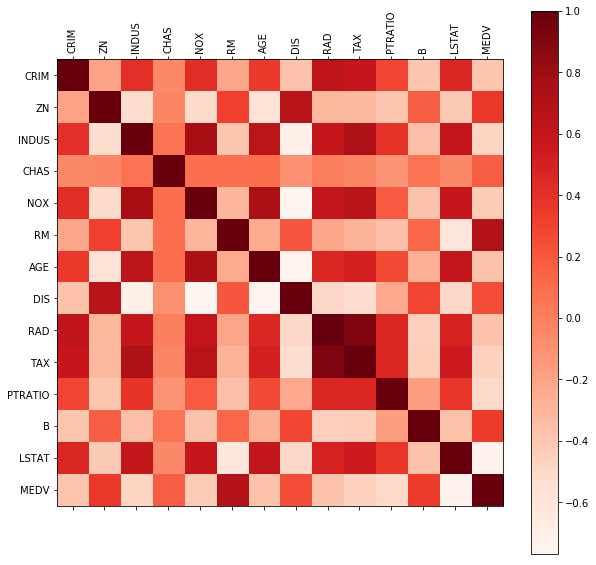

In [4]:
# Correlation matrix
names = ["CRIM", "ZN", "INDUS", "CHAS","NOX","RM",
        "AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(),cmap="Reds")
fig.colorbar(cax)

ax.set_xticklabels(['']+names)
ax.set_yticklabels(['']+names)
plt.xticks(rotation=90)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.show()

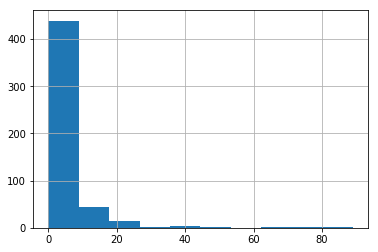

In [5]:
dataset["CRIM"].hist()

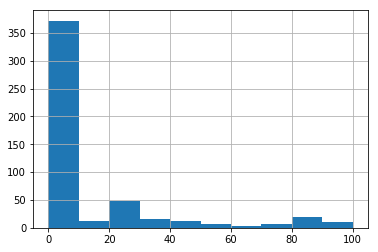

In [6]:
dataset["ZN"].hist()

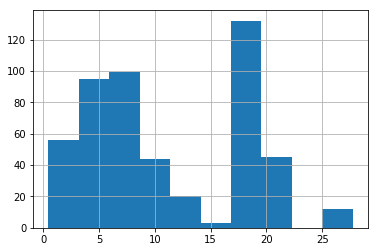

In [7]:
dataset["INDUS"].hist()

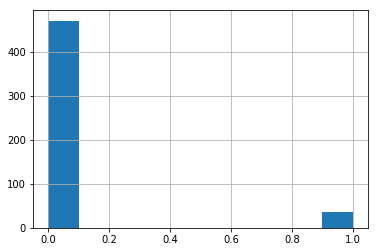

In [8]:
dataset["CHAS"].hist()

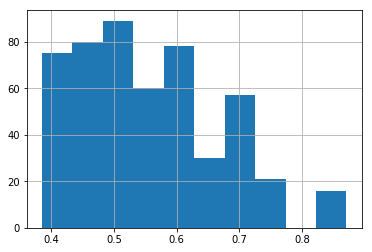

In [9]:
dataset["NOX"].hist()

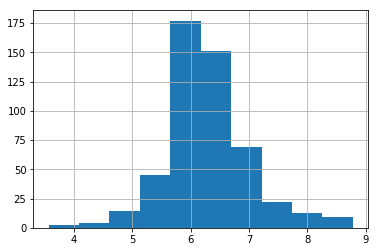

In [10]:
dataset["RM"].hist()

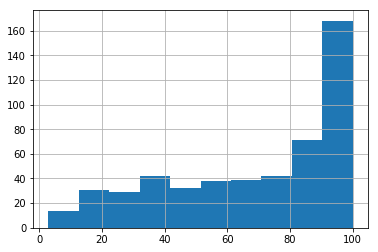

In [11]:
dataset["AGE"].hist()

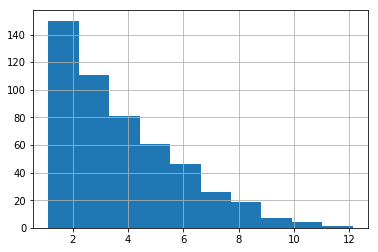

In [12]:
dataset["DIS"].hist()

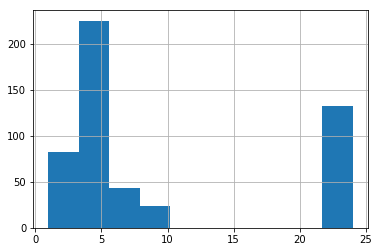

In [13]:
dataset["RAD"].hist()

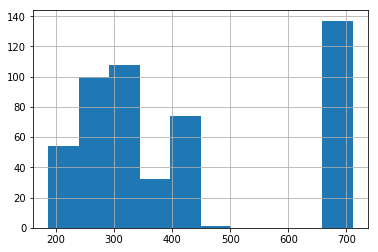

In [14]:
dataset["TAX"].hist()

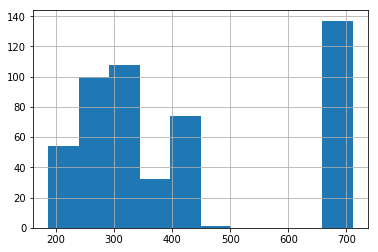

In [15]:
dataset["TAX"].hist()

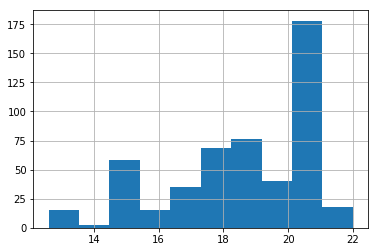

In [16]:
dataset["PTRATIO"].hist()

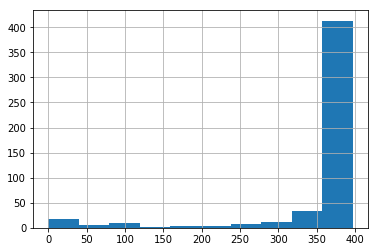

In [17]:
dataset["B"].hist()

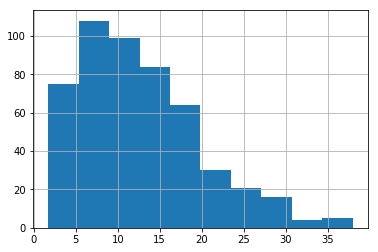

In [18]:
dataset["LSTAT"].hist()

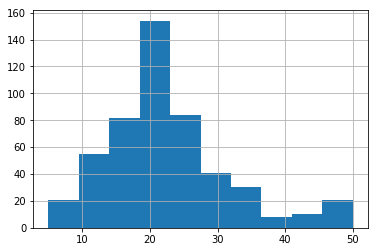

In [19]:
dataset["MEDV"].hist()

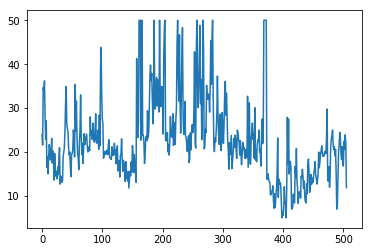

In [20]:
dataset["MEDV"].plot()

In [21]:
# Load the data into numpy for the deeplearning part
dataSetAsNumpy = np.loadtxt("housing.data")
# Set training and testing sets about a 80/20 split
trainingSet, testSet = dataSetAsNumpy[:400,:], dataSetAsNumpy[400:,:]

In [22]:
# Split into input and output variables
X = trainingSet[:,0:13]
Y = trainingSet[:,13]
Xtest = testSet[:,0:13]
Ytest = testSet[:,13]

In [23]:
# Make the model
model = Sequential()
model.add(Dense(13, input_dim=13, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1))

In [24]:
# Compile the model
model.compile(loss="mean_squared_error",optimizer="adam")

In [25]:
# Fit the model
history = model.fit(X,Y,epochs=150, batch_size=5)

Epoch 1/150
400/400 [==============================] - 0s 652us/step - loss: 564.2003
Epoch 2/150
400/400 [==============================] - 0s 147us/step - loss: 114.5840
Epoch 3/150
400/400 [==============================] - 0s 145us/step - loss: 92.8855
Epoch 4/150
400/400 [==============================] - 0s 144us/step - loss: 84.7175
Epoch 5/150
400/400 [==============================] - 0s 152us/step - loss: 79.2841
Epoch 6/150
400/400 [==============================] - 0s 154us/step - loss: 75.6805
Epoch 7/150
400/400 [==============================] - 0s 162us/step - loss: 74.4599
Epoch 8/150
400/400 [==============================] - 0s 155us/step - loss: 72.1303
Epoch 9/150
400/400 [==============================] - 0s 173us/step - loss: 74.3446
Epoch 10/150
400/400 [==============================] - 0s 164us/step - loss: 71.2187
Epoch 11/150
400/400 [==============================] - 0s 160us/step - loss: 69.4517
Epoch 12/150
400/400 [==============================] - 0s 16

In [26]:
# Evaluate the model
score = model.evaluate(Xtest, Ytest)
print(str(model.metrics_names[0]) + ": " , round(score,3))

106/106 [==============================] - 0s 303us/step
loss:  23.938


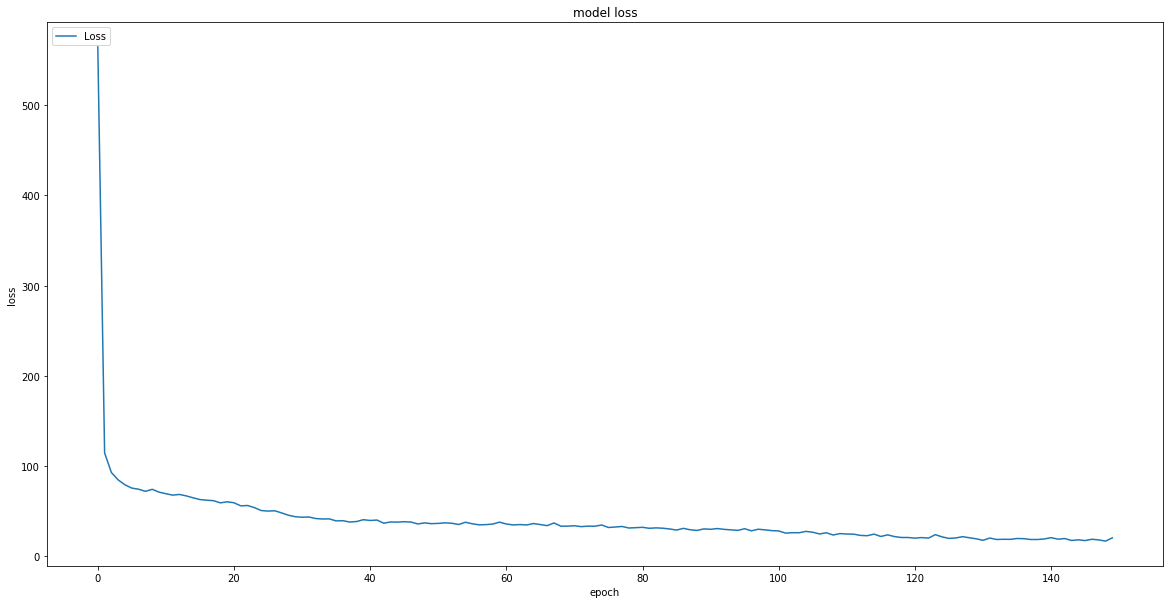

In [27]:
# history for loss
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Loss'], loc='upper left')
plt.savefig('loss.png', bbox_inches='tight')

In [28]:
predictions = model.predict(X)

In [29]:
flat = [i for i in predictions]


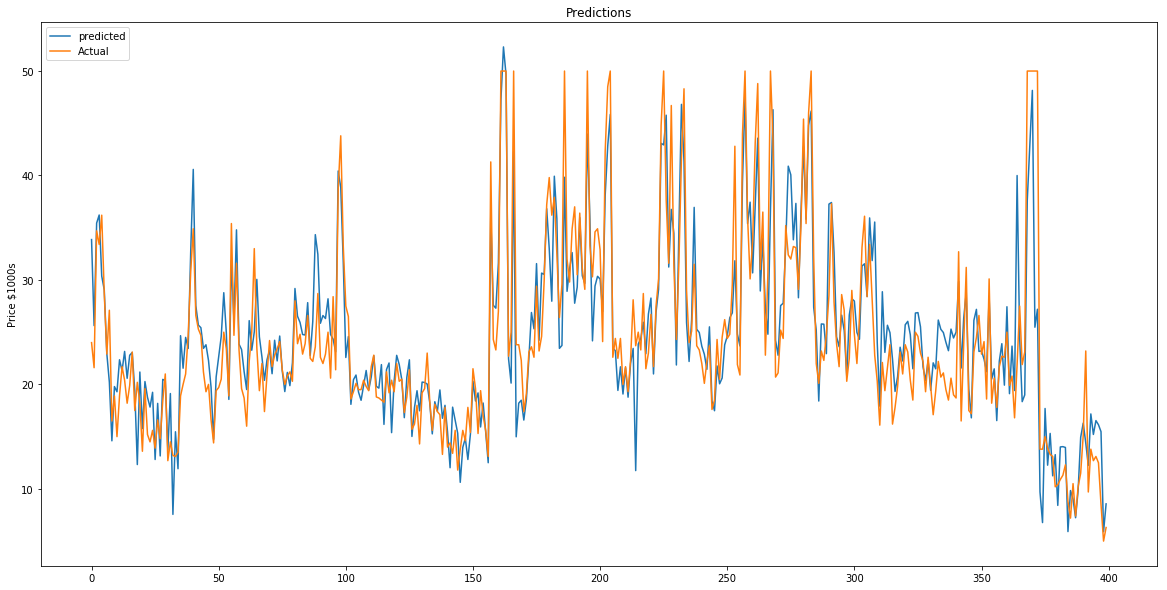

In [30]:
plt.figure(figsize=(20,10))
plt.plot(flat)
plt.plot(Y)
plt.title("Predictions")
plt.ylabel('Price $1000s')
plt.legend(['predicted','Actual'], loc='upper left')
# plt.savefig('larger.png', bbox_inches='tight') # Uncomment if you want to save the file